In [465]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import copy
import datetime as dt
import math

from collections import Counter
from IPython.core.display import display, HTML
sns.set_style('darkgrid')
pd.set_option('display.max_columns', 50)

np.random.seed(42)

/var/folders/2s/vn5cktys5h52l3_nj5t4fq480000gn/T/ipykernel_92405/2902973805.py:11: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [466]:
Result_NB = pd.read_csv(f"result_NB_ALL.csv")

In [467]:
Result_NB

,Unnamed: 0,Model,Precision,Recall,f1 Score,Accuracy(Training),Accuracy(Test),Training Time,Testing Time (Train),TestingTime
0,0,NB,0.380600,0.217038,0.143414,0.216985,0.217038,1.366378,2.700383,1.152417
1,1,NB,0.439946,0.219746,0.148688,0.219492,0.219746,1.364829,2.724196,1.178468
2,2,NB,0.372238,0.195354,0.116324,0.196046,0.195354,1.350504,2.693145,1.156139
3,3,NB,0.457084,0.185872,0.107622,0.185668,0.185872,1.338569,2.692800,1.180249
4,4,NB,0.386817,0.196475,0.118001,0.196923,0.196475,1.345512,2.694304,1.129223
5,5,NB,0.442716,0.219885,0.149798,0.219712,0.219885,1.364670,2.698605,1.207966
6,6,NB,0.384962,0.311075,0.156774,0.312030,0.311075,1.379444,2.639334,1.152166
7,7,NB,0.374801,0.276606,0.194786,0.276044,0.276606,1.376409,2.670256,1.188026
8,8,NB,0.407532,0.182319,0.096278,0.182029,0.182319,1.376638,2.654173,1.098334
9,9,NB,0.297312,0.307206,0.180320,0.307294,0.307206,1.351779,2.753807,1.156133


In [468]:
np.mean(Result_NB["Precision"])

0.3805792920083596

In [469]:
np.std(Result_NB["Precision"])

0.051079538202907025

In [470]:
# NB_mean = np.mean(Result_NB).transpose().to_frame()
NB_mean = pd.DataFrame(np.mean(Result_NB)).transpose()
NB_mean["Metric"] = "Mean"
NB_std = pd.DataFrame(np.std(Result_NB)).transpose()
NB_std["Metric"] = "Std"
NB_Result = pd.concat([NB_mean, NB_std], axis=0)

NB_Result.insert(loc = 0,
          column = 'Algorithm',
          value = ["NB", "NB"])
# NB_Result["Algorithm"] = "NB"

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3472: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3613: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


In [471]:
type(NB_Result)

pandas.core.frame.DataFrame

In [472]:
NB_Result

,Algorithm,Unnamed: 0,Precision,Recall,f1 Score,Accuracy(Training),Accuracy(Test),Training Time,Testing Time (Train),TestingTime,Metric
0,NB,14.500000,0.380579,0.270645,0.157685,0.270724,0.270645,1.369216,2.688728,1.166937,Mean
0,NB,8.655441,0.051080,0.053398,0.031568,0.053409,0.053398,0.023000,0.031975,0.026371,Std


In [473]:
Result_LR = pd.read_csv(f"result_LR_ALL.csv")

In [474]:
Result_LR

,Unnamed: 0,Model,Precision,Recall,f1 Score,Accuracy(Training),Accuracy(Test),Training Time,Testing Time (Train),TestingTime
0,0,LR,0.486541,0.490832,0.474958,0.491270,0.490832,2137.043606,0.421715,0.179400
1,1,LR,0.485810,0.489564,0.473312,0.490183,0.489564,1921.997050,0.409630,0.156419
2,2,LR,0.487492,0.491505,0.475186,0.490805,0.491505,2197.635911,0.368766,0.166443
3,3,LR,0.490136,0.493169,0.476145,0.494194,0.493169,2134.720045,0.400660,0.167383
4,4,LR,0.482837,0.488242,0.472847,0.488698,0.488242,2181.056325,0.404649,0.171427
5,5,LR,0.483431,0.486433,0.470137,0.486784,0.486433,2112.104273,0.404684,0.169433
6,6,LR,0.487670,0.490891,0.474140,0.491315,0.490891,2278.012394,0.402691,0.164450
7,7,LR,0.483126,0.489507,0.475464,0.490159,0.489507,2406.288215,0.412693,0.171427
8,8,LR,0.487853,0.492509,0.477944,0.492509,0.492509,1873.301375,0.421414,0.188432
9,9,LR,0.488478,0.492561,0.476320,0.492509,0.492561,2117.314808,0.418768,0.209299


In [475]:
LR_mean = pd.DataFrame(np.mean(Result_LR)).transpose()
LR_mean["Metric"] = "Mean"
LR_std = pd.DataFrame(np.std(Result_LR)).transpose()
LR_std["Metric"] = "Std"
LR_Result = pd.concat([LR_mean, LR_std], axis=0)

LR_Result.insert(loc = 0,
          column = 'Algorithm',
          value = ["LR", "LR"])

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3472: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3613: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


In [476]:
LR_Result

,Algorithm,Unnamed: 0,Precision,Recall,f1 Score,Accuracy(Training),Accuracy(Test),Training Time,Testing Time (Train),TestingTime,Metric
0,LR,14.500000,0.487435,0.491497,0.475754,0.491668,0.491497,2159.696300,0.395596,0.172606,Mean
0,LR,8.655441,0.004064,0.003879,0.004522,0.003792,0.003879,189.460479,0.020908,0.013139,Std


In [477]:
Result_KNN = pd.read_csv(f"result_KNN_ALL.csv")

In [478]:
Result_KNN

,Unnamed: 0,Model,Precision,Recall,f1 Score,Accuracy(Training),Accuracy(Test),Training Time,Testing Time (Train),TestingTime
0,0,KNN,0.733795,0.733063,0.733034,0.999105,0.733063,0.203104,3233.493381,1403.440047
1,1,KNN,0.734757,0.734008,0.733993,0.999088,0.734008,0.180036,3253.357025,1413.769253
2,2,KNN,0.734596,0.733848,0.733853,0.999093,0.733848,0.187496,3260.760576,1402.676655
3,3,KNN,0.734102,0.733391,0.733379,0.999103,0.733391,0.156290,3226.367579,1388.132285
4,4,KNN,0.733666,0.732966,0.732941,0.999076,0.732966,0.194201,3232.949458,1402.504226
5,5,KNN,0.734317,0.733600,0.733591,0.999083,0.733600,0.156249,3258.768374,1392.246777
6,6,KNN,0.733548,0.732828,0.732819,0.999108,0.732828,0.187480,3237.825007,1398.442657
7,7,KNN,0.734125,0.733343,0.733332,0.999100,0.733343,0.164970,3278.913028,1397.430520
8,8,KNN,0.734062,0.733349,0.733331,0.999099,0.733349,0.156283,3262.445033,1397.402201
9,9,KNN,0.733916,0.733184,0.733177,0.999106,0.733184,0.174428,3281.986900,1410.786588


In [479]:
KNN_mean = pd.DataFrame(np.mean(Result_KNN)).transpose()
KNN_mean["Metric"] = "Mean"
KNN_std = pd.DataFrame(np.std(Result_KNN)).transpose()
KNN_std["Metric"] = "Std"
KNN_Result = pd.concat([KNN_mean, KNN_std], axis=0)

KNN_Result.insert(loc = 0,
          column = 'Algorithm',
          value = ["KNN", "KNN"])

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3472: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3613: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


In [480]:
KNN_Result

,Algorithm,Unnamed: 0,Precision,Recall,f1 Score,Accuracy(Training),Accuracy(Test),Training Time,Testing Time (Train),TestingTime,Metric
0,KNN,14.500000,0.734163,0.733427,0.733413,0.999097,0.733427,0.174547,3248.571126,1410.650823,Mean
0,KNN,8.655441,0.000383,0.000383,0.000385,0.000012,0.000383,0.014045,27.910783,13.307441,Std


In [481]:
Result_DT = pd.read_csv(f"result_DT_ALL.csv")

In [482]:
Result_DT

,Unnamed: 0,Model,Precision,Recall,f1 Score,Accuracy(Training),Accuracy(Test),Training Time,Testing Time (Train),TestingTime
0,0,DT,0.913754,0.913800,0.913677,0.950402,0.913800,35.119144,0.751662,0.362787
1,1,DT,0.914338,0.914419,0.914304,0.951142,0.914419,35.482262,0.777330,0.326907
2,2,DT,0.913306,0.913360,0.913228,0.950016,0.913360,35.591358,0.753486,0.363783
3,3,DT,0.914247,0.914264,0.914148,0.950787,0.914264,34.932627,0.726573,0.358800
4,4,DT,0.913845,0.913850,0.913719,0.951086,0.913850,34.753880,0.738533,0.349830
5,5,DT,0.914399,0.914457,0.914358,0.951337,0.914457,34.672006,0.752135,0.319930
6,6,DT,0.914093,0.914159,0.914046,0.951426,0.914159,35.571252,0.787366,0.323917
7,7,DT,0.912961,0.913014,0.912891,0.948986,0.913014,36.125063,0.804314,0.321923
8,8,DT,0.914810,0.914864,0.914753,0.951550,0.914864,35.904118,0.774410,0.322920
9,9,DT,0.914055,0.914130,0.914033,0.951494,0.914130,35.891192,0.781387,0.341866


In [483]:
DT_mean = pd.DataFrame(np.mean(Result_DT)).transpose()
DT_mean["Metric"] = "Mean"
DT_std = pd.DataFrame(np.std(Result_DT)).transpose()
DT_std["Metric"] = "Std"
DT_Result = pd.concat([DT_mean, DT_std], axis=0)

DT_Result.insert(loc = 0,
          column = 'Algorithm',
          value = ["DT", "DT"])

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3472: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3613: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


In [484]:
DT_Result

,Algorithm,Unnamed: 0,Precision,Recall,f1 Score,Accuracy(Training),Accuracy(Test),Training Time,Testing Time (Train),TestingTime,Metric
0,DT,14.500000,0.914073,0.914119,0.914001,0.950771,0.914119,35.74497,0.770119,0.334682,Mean
0,DT,8.655441,0.000549,0.000544,0.000546,0.000611,0.000544,0.37312,0.015659,0.015020,Std


In [485]:
Result_RF = pd.read_csv(f"result_RF_ALL.csv")

In [486]:
Result_RF

,Unnamed: 0,Model,Precision,Recall,f1 Score,Accuracy(Training),Accuracy(Test),Training Time,Testing Time (Train),TestingTime
0,0,RF,0.935515,0.935376,0.935428,0.999264,0.935376,4904.669904,667.838485,288.238789
1,1,RF,0.935279,0.935108,0.935172,0.999249,0.935108,5079.496886,721.986173,302.824373
2,2,RF,0.935179,0.935012,0.935072,0.999250,0.935012,5082.623088,730.574453,303.901318
3,3,RF,0.935251,0.935066,0.935132,0.999253,0.935066,5147.501196,783.069066,334.569846
4,4,RF,0.935145,0.934956,0.935025,0.999239,0.934956,5213.035645,715.421686,305.880060
5,5,RF,0.935476,0.935299,0.935367,0.999248,0.935299,5110.742282,699.931156,302.736848
6,6,RF,0.935251,0.935068,0.935137,0.999260,0.935068,5132.342554,730.674576,299.355501
7,7,RF,0.935299,0.935141,0.935199,0.999256,0.935141,5086.359033,706.746073,298.736459
8,8,RF,0.935354,0.935186,0.935250,0.999257,0.935186,5083.713506,733.842451,302.949864
9,9,RF,0.935079,0.934913,0.934975,0.999265,0.934913,4999.066410,731.380537,310.432422


In [487]:
RF_mean = pd.DataFrame(np.mean(Result_RF)).transpose()
RF_mean["Metric"] = "Mean"
RF_std = pd.DataFrame(np.std(Result_RF)).transpose()
RF_std["Metric"] = "Std"
RF_Result = pd.concat([RF_mean, RF_std], axis=0)

RF_Result.insert(loc = 0,
          column = 'Algorithm',
          value = ["RF", "RF"])

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3472: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3613: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


In [488]:
RF_Result

,Algorithm,Unnamed: 0,Precision,Recall,f1 Score,Accuracy(Training),Accuracy(Test),Training Time,Testing Time (Train),TestingTime,Metric
0,RF,14.500000,0.935341,0.935172,0.935235,0.999257,0.935172,5068.783336,721.317386,305.943562,Mean
0,RF,8.655441,0.000219,0.000223,0.000221,0.000011,0.000223,82.351570,23.926124,10.981861,Std


In [489]:
Result_XGB = pd.read_csv(f"result_XGB_ALL.csv")

In [490]:
Result_XGB

,Unnamed: 0,Model,Precision,Recall,f1 Score,Accuracy(Training),Accuracy(Test),Training Time,Testing Time (Train),TestingTime
0,0,XGB,0.961354,0.961349,0.961348,0.999264,0.961349,27427.137352,147.719334,65.175086
1,1,XGB,0.961519,0.961504,0.961508,0.999248,0.961504,11782.068197,77.445029,33.393457
2,2,XGB,0.961572,0.961569,0.961569,0.999250,0.961569,11398.470231,76.040790,32.959486
3,3,XGB,0.961454,0.961444,0.961446,0.999252,0.961444,11774.691715,84.937983,36.932263
4,4,XGB,0.961516,0.961508,0.961510,0.999239,0.961508,11778.159197,86.660578,37.325303
5,5,XGB,0.961495,0.961488,0.961488,0.999247,0.961488,12044.389244,85.437465,37.496029
6,6,XGB,0.961499,0.961490,0.961493,0.999260,0.961490,11999.292958,86.087626,37.051847
7,7,XGB,0.961814,0.961810,0.961810,0.999232,0.961810,11755.943096,86.763326,37.030173
8,8,XGB,0.961491,0.961484,0.961484,0.999257,0.961484,12477.469476,96.507920,40.725007
9,9,XGB,0.961137,0.961122,0.961126,0.999260,0.961122,12408.188467,93.002706,40.031075


In [491]:
XGB_mean = pd.DataFrame(np.mean(Result_XGB)).transpose()
XGB_mean["Metric"] = "Mean"
XGB_std = pd.DataFrame(np.std(Result_XGB)).transpose()
XGB_std["Metric"] = "Std"
XGB_Result = pd.concat([XGB_mean, XGB_std], axis=0)

XGB_Result.insert(loc = 1,
          column = 'Algorithm',
          value = ["XGB", "XGB"])

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3472: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3613: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


In [492]:
XGB_Result

,Unnamed: 0,Algorithm,Precision,Recall,f1 Score,Accuracy(Training),Accuracy(Test),Training Time,Testing Time (Train),TestingTime,Metric
0,14.500000,XGB,0.961494,0.961487,0.961488,0.999257,0.961487,12424.338930,88.971595,38.525481,Mean
0,8.655441,XGB,0.000182,0.000183,0.000182,0.000011,0.000183,2797.674073,12.953311,5.626532,Std


In [493]:
resultALL = pd.concat([NB_Result, LR_Result, KNN_Result, DT_Result, RF_Result, XGB_Result], axis=0)
col = resultALL.pop('Metric')
resultALL.insert(2, col.name, col)
col = resultALL.pop('Unnamed: 0')
resultALL.insert(0, col.name, col)
#resultALL.drop('Unnamed: 0')

In [494]:
resultALL

,Unnamed: 0,Algorithm,Metric,Precision,Recall,f1 Score,Accuracy(Training),Accuracy(Test),Training Time,Testing Time (Train),TestingTime
0,14.500000,NB,Mean,0.380579,0.270645,0.157685,0.270724,0.270645,1.369216,2.688728,1.166937
0,8.655441,NB,Std,0.051080,0.053398,0.031568,0.053409,0.053398,0.023000,0.031975,0.026371
0,14.500000,LR,Mean,0.487435,0.491497,0.475754,0.491668,0.491497,2159.696300,0.395596,0.172606
0,8.655441,LR,Std,0.004064,0.003879,0.004522,0.003792,0.003879,189.460479,0.020908,0.013139
0,14.500000,KNN,Mean,0.734163,0.733427,0.733413,0.999097,0.733427,0.174547,3248.571126,1410.650823
0,8.655441,KNN,Std,0.000383,0.000383,0.000385,0.000012,0.000383,0.014045,27.910783,13.307441
0,14.500000,DT,Mean,0.914073,0.914119,0.914001,0.950771,0.914119,35.744970,0.770119,0.334682
0,8.655441,DT,Std,0.000549,0.000544,0.000546,0.000611,0.000544,0.373120,0.015659,0.015020
0,14.500000,RF,Mean,0.935341,0.935172,0.935235,0.999257,0.935172,5068.783336,721.317386,305.943562
0,8.655441,RF,Std,0.000219,0.000223,0.000221,0.000011,0.000223,82.351570,23.926124,10.981861


In [495]:
resultALL.to_csv("results_ML_ALL")

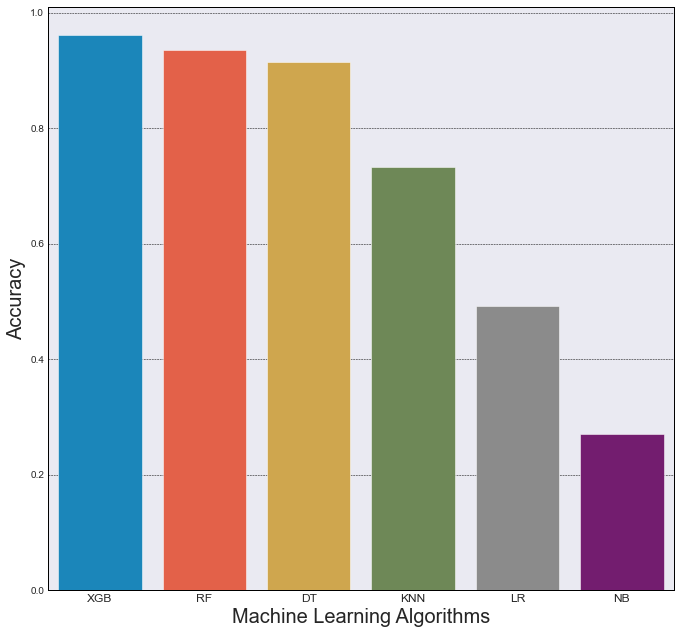

In [496]:
MLResults = resultALL.query("Metric == 'Mean'")
MLResults = MLResults.sort_values('Accuracy(Test)', ascending=False)

fig, ax = plt.subplots(figsize=(10,10))
sns.barplot(data=MLResults, x='Algorithm', y='Accuracy(Test)')
#sns.barplot(data=dtResults, x='Model', y='R2_Score(Training)')
ax.set_xlabel("Machine Learning Algorithms",fontsize=20)
ax.set_ylabel("Accuracy",fontsize=20)
# ax.tick_params(axis='both', which='major', labelsize=15)

ax.tick_params(axis='y', which='major', color='black', labelsize=10)
ax.tick_params(axis='x', which='major', color='black', labelsize=12)
plt.grid(axis = 'y', color = 'black', linestyle = '--', linewidth = 0.5)
plt.setp(ax.spines.values(), lw=1, color='black')
plt.show()

# fig.savefig("result_accuracy_test.png", bbox_inches='tight', facecolor='white', transparent=True, dpi=300)
fig.savefig(f"result_accuracy_test.png", bbox_inches='tight', facecolor='white', edgecolor='black', transparent=True, dpi=300)

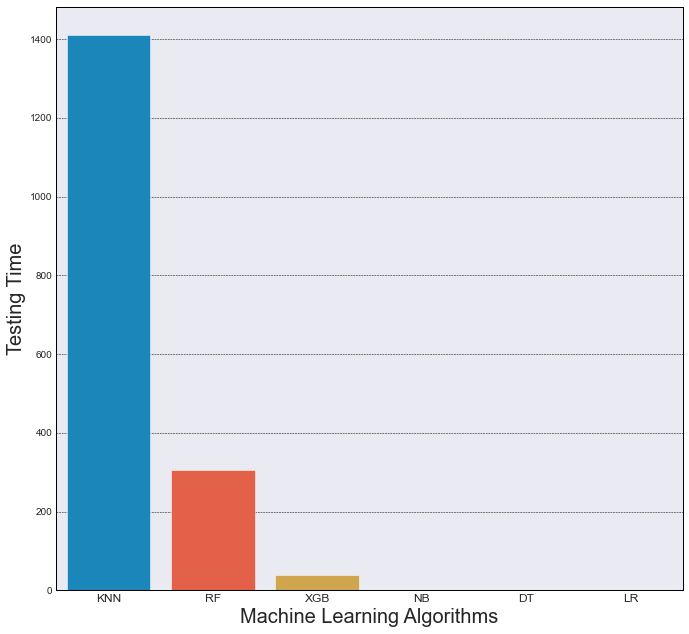

In [497]:
MLResults = resultALL.query("Metric == 'Mean'")
MLResults = MLResults.sort_values('TestingTime', ascending=False)

fig, ax = plt.subplots(figsize=(10,10))
sns.barplot(data=MLResults, x='Algorithm', y='TestingTime')
#sns.barplot(data=dtResults, x='Model', y='R2_Score(Training)')
ax.set_xlabel("Machine Learning Algorithms",fontsize=20)
ax.set_ylabel("Testing Time",fontsize=20)
# ax.tick_params(axis='both', which='major', labelsize=15)

ax.tick_params(axis='y', which='major', color='black', labelsize=10)
ax.tick_params(axis='x', which='major', color='black', labelsize=12)
plt.grid(axis = 'y', color = 'black', linestyle = '--', linewidth = 0.5)
plt.setp(ax.spines.values(), lw=1, color='black')
plt.show()

# fig.savefig("result_accuracy_test.png", bbox_inches='tight', facecolor='white', transparent=True, dpi=300)
fig.savefig(f"result_time_test.png", bbox_inches='tight', facecolor='white', edgecolor='black', transparent=True, dpi=300)

In [498]:
dfBoxPlotAccuracy = pd.DataFrame()
dfBoxPlotAccuracy["XGB"] = Result_XGB["Accuracy(Test)"]
dfBoxPlotAccuracy["RF"] = Result_RF["Accuracy(Test)"]
dfBoxPlotAccuracy["DT"] = Result_DT["Accuracy(Test)"]
dfBoxPlotAccuracy["KNN"] = Result_KNN["Accuracy(Test)"]
dfBoxPlotAccuracy["LR"] = Result_LR["Accuracy(Test)"]
dfBoxPlotAccuracy["NB"] = Result_NB["Accuracy(Test)"]

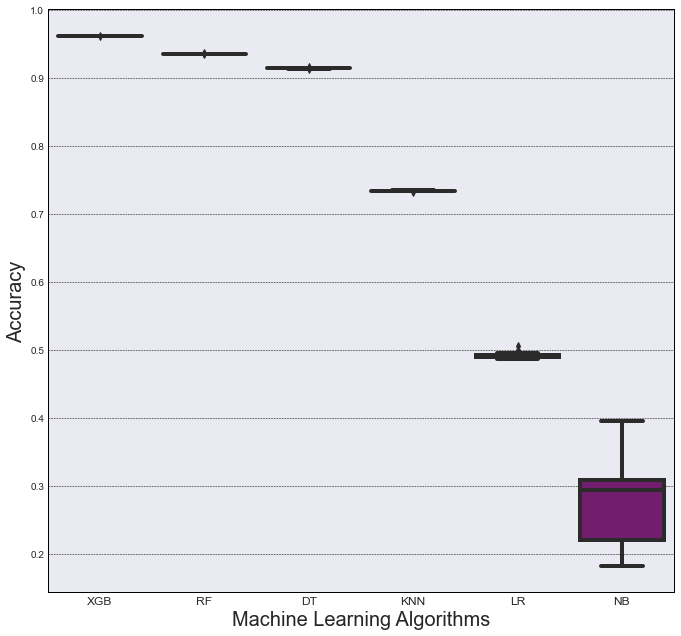

In [499]:
fig, ax = plt.subplots(figsize=(10,10))
sns.boxplot(data=dfBoxPlotAccuracy)
#sns.barplot(data=dtResults, x='Model', y='R2_Score(Training)')
ax.set_xlabel("Machine Learning Algorithms",fontsize=20)
ax.set_ylabel("Accuracy",fontsize=20)
# ax.tick_params(axis='both', which='major', labelsize=15)

ax.tick_params(axis='y', which='major', color='black', labelsize=10)
ax.tick_params(axis='x', which='major', color='black', labelsize=12)
plt.grid(axis = 'y', color = 'black', linestyle = '--', linewidth = 0.5)
plt.setp(ax.spines.values(), lw=1, color='black')
plt.show()

# fig.savefig("result_accuracy_test.png", bbox_inches='tight', facecolor='white', transparent=True, dpi=300)
fig.savefig(f"result_accuracy_test_box.png", bbox_inches='tight', facecolor='white', edgecolor='black', transparent=True, dpi=300)

In [500]:
dfBoxPlotTime = pd.DataFrame()
dfBoxPlotTime["XGB"] = Result_XGB["TestingTime"]
dfBoxPlotTime["RF"] = Result_RF["TestingTime"]
dfBoxPlotTime["DT"] = Result_DT["TestingTime"]
dfBoxPlotTime["KNN"] = Result_KNN["TestingTime"]
dfBoxPlotTime["LR"] = Result_LR["TestingTime"]
dfBoxPlotTime["NB"] = Result_NB["TestingTime"]

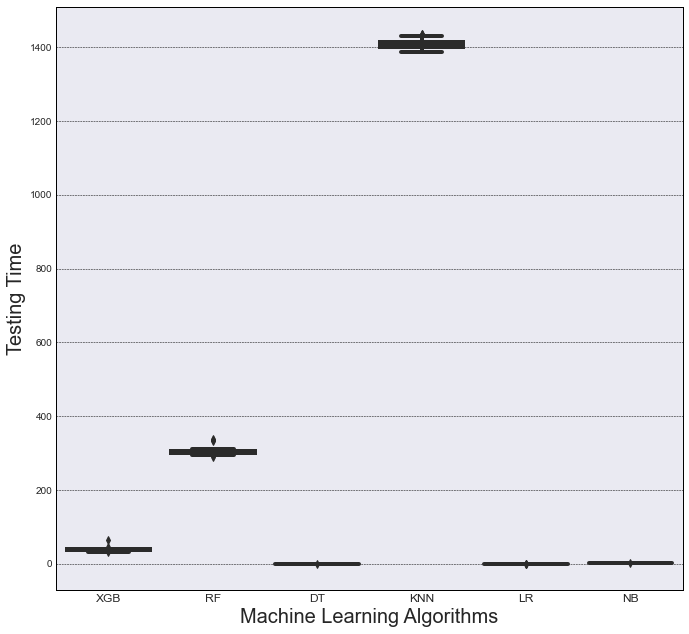

In [501]:
fig, ax = plt.subplots(figsize=(10,10))
sns.boxplot(data=dfBoxPlotTime)
#sns.barplot(data=dtResults, x='Model', y='R2_Score(Training)')
ax.set_xlabel("Machine Learning Algorithms",fontsize=20)
ax.set_ylabel("Testing Time",fontsize=20)
# ax.tick_params(axis='both', which='major', labelsize=15)

ax.tick_params(axis='y', which='major', color='black', labelsize=10)
ax.tick_params(axis='x', which='major', color='black', labelsize=12)
plt.grid(axis = 'y', color = 'black', linestyle = '--', linewidth = 0.5)
plt.setp(ax.spines.values(), lw=1, color='black')
plt.show()

# fig.savefig("result_accuracy_test.png", bbox_inches='tight', facecolor='white', transparent=True, dpi=300)
fig.savefig(f"result_time_test_box.png", bbox_inches='tight', facecolor='white', edgecolor='black', transparent=True, dpi=300)